In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df= pd.read_csv("uber.csv")

In [21]:
df.head(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


In [23]:
df.shape

(200000, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [29]:
df.size

1800000

In [35]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


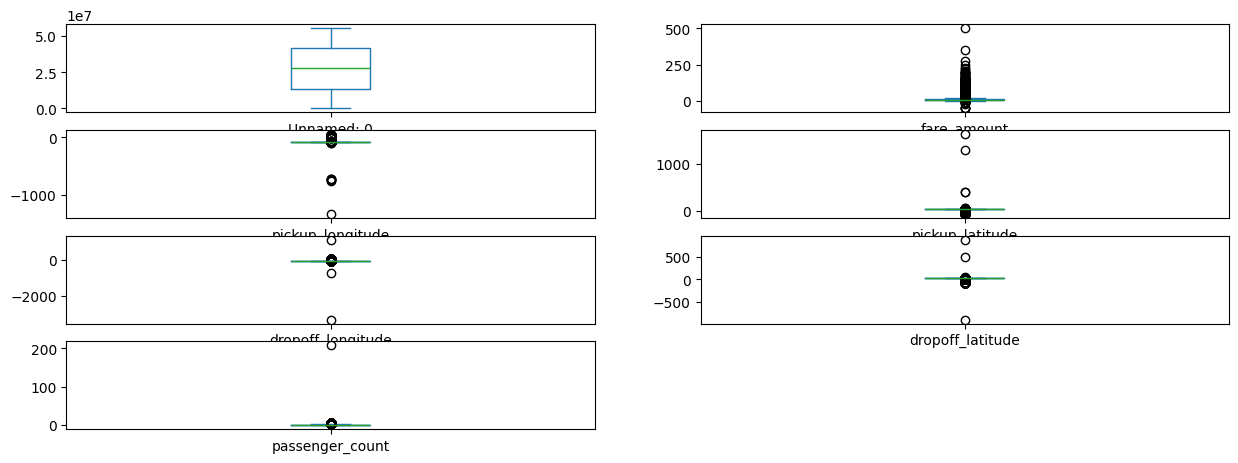

In [39]:
df.plot(kind="box",subplots=True, layout=(6,2), figsize=(15,8))
plt.show()

In [43]:
df.rename(columns={'Unnamed: 0':'id'}, inplace=True)               # renaming unnamed column
df["pickup_datetime"] = pd.to_datetime(df['pickup_datetime'])      # changing datatype to datetime
df['day']     = df['pickup_datetime'].apply(lambda x:x.day)
df['hour']    = df['pickup_datetime'].apply(lambda x:x.hour)
df['weekday'] = df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
# df['weekday'] = df['pickup_datetime'].apply(lambda x:x.weekday()+1)
df['month']   = df['pickup_datetime'].apply(lambda x:x.month)
df['year']    = df['pickup_datetime'].apply(lambda x:x.year)
df.head()

NameError: name 'calendar' is not defined

In [41]:
Q1 = np.percentile(df['fare_amount'], 25)
Q3 = np.percentile(df['fare_amount'], 75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print("Upper = ", upper)
print("Lower = ", lower)

Upper =  22.25
Lower =  -3.75
